In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
from tensorflow.keras.optimizers import Adam as adam
import matplotlib.pyplot as plt

Let's download the dataframe:

In [2]:
(train_x, train_y), (test_x, test_y) = datasets.cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

n_train, h, w, n_chan = tuple(train_x.shape)

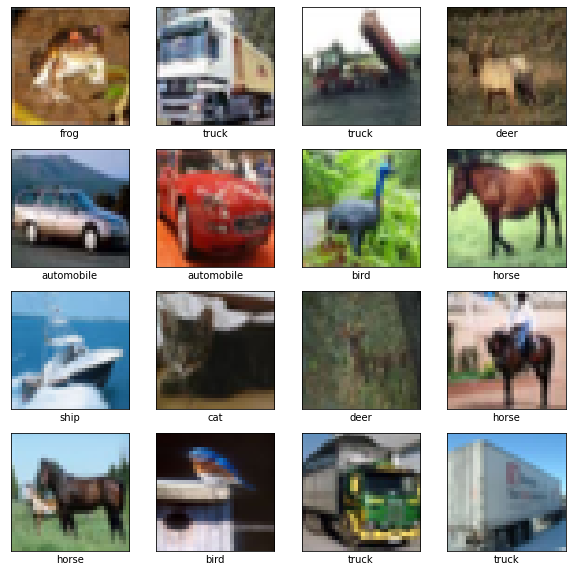

In [3]:
n_plot = 4  # set number of nodes per axis

plt.figure(figsize=(10,10))
for i in range(n_plot**2):
    plt.subplot(n_plot,n_plot,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_y[i][0]])
plt.show()

And normalise the dependent variables, subtracting the mean brightness from each channel following scaling.

In [4]:
train_x, test_x = (train_x/127.5 - 1., test_x/127.5 - 1.)

Now we can begin assembling our model.

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, 2, activation='relu', input_shape=(h, w, n_chan)),
    keras.layers.Conv2D(32, 2, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(.3),
    
    keras.layers.Conv2D(64, 2, activation='relu'),
    keras.layers.Conv2D(64, 2, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(.3),

    keras.layers.Flatten(),
    keras.layers.Dense(500, activation='sigmoid'),
    keras.layers.Dropout(.3),
    keras.layers.Dense(len(class_names), activation='sigmoid')
    ])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

In [1]:
history = model.fit(train_x, train_y, epochs=10, 
                    validation_data=(test_x, test_y), verbose=1)

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(history.history['accuracy'], 'k', label='accuracy')
ax.plot(history.history['val_accuracy'], 'r--', label = 'val_accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend

fig.show()